# GEOparse
https://geoparse.readthedocs.io/en/latest/GEOparse.html

In [ ]:
import GEOparse
import pandas as pd

In [3]:
import pylab as pl
import seaborn as sns
pl.rcParams['figure.figsize'] = (14, 10)
pl.rcParams['ytick.labelsize'] = 12
pl.rcParams['xtick.labelsize'] = 11
pl.rcParams['axes.labelsize'] = 23
pl.rcParams['legend.fontsize'] = 20
sns.set_style('ticks')
c1, c2, c3, c4 = sns.color_palette("Set1", 4)


In [4]:
gse = GEOparse.get_GEO("GSE83452")

08-Sep-2020 10:45:43 DEBUG utils - Directory ./ already exists. Skipping.
08-Sep-2020 10:45:43 INFO GEOparse - File already exist: using local version.
08-Sep-2020 10:45:43 INFO GEOparse - Parsing ./GSE83452_family.soft.gz: 
08-Sep-2020 10:45:43 DEBUG GEOparse - DATABASE: GeoMiame
08-Sep-2020 10:45:43 DEBUG GEOparse - SERIES: GSE83452
08-Sep-2020 10:45:43 DEBUG GEOparse - PLATFORM: GPL16686
08-Sep-2020 10:45:43 DEBUG GEOparse - SAMPLE: GSM2203254
08-Sep-2020 10:45:43 DEBUG GEOparse - SAMPLE: GSM2203255
08-Sep-2020 10:45:43 DEBUG GEOparse - SAMPLE: GSM2203256
08-Sep-2020 10:45:43 DEBUG GEOparse - SAMPLE: GSM2203257
08-Sep-2020 10:45:43 DEBUG GEOparse - SAMPLE: GSM2203258
08-Sep-2020 10:45:43 DEBUG GEOparse - SAMPLE: GSM2203259
08-Sep-2020 10:45:43 DEBUG GEOparse - SAMPLE: GSM2203260
08-Sep-2020 10:45:44 DEBUG GEOparse - SAMPLE: GSM2203261
08-Sep-2020 10:45:44 DEBUG GEOparse - SAMPLE: GSM2203262
08-Sep-2020 10:45:44 DEBUG GEOparse - SAMPLE: GSM2203263
08-Sep-2020 10:45:44 DEBUG GEOparse 

In [12]:
gse.gpls

{'GPL16686': <d: GPL16686>}

In [6]:
gse.gpls['GPL16686'].columns

,description
ID,"transcript_cluster_id LINK_PRE:""https://www.af..."
RANGE_STRAND,strand (+|-)
RANGE_START,start (integer). Coordinates are standard 1-b...
RANGE_END,
total_probes,Total number of probes contained by this trans...
GB_ACC,GenBank and RefSeq Accessions from mrna_assign...
SPOT_ID,genomic location of the transcript cluster in ...
RANGE_GB,NCBI RefSeq for chromosome of current build


In [11]:
gse.gsms["GSM2203483"].columns

,description
ID_REF,
VALUE,Log2 RMA signal


In [72]:
%%time

df = gse.pivot_samples('VALUE')

CPU times: user 6.62 s, sys: 1.46 s, total: 8.08 s
Wall time: 8.08 s


In [74]:
df.index = df.index.map(str)

In [75]:
df.index

Index(['16650001', '16650003', '16650005', '16650007', '16650009', '16650011',
       '16650013', '16650015', '16650017', '16650019',
       ...
       '17127703', '17127705', '17127707', '17127709', '17127711', '17127713',
       '17127715', '17127717', '17127719', '17127721'],
      dtype='object', name='ID_REF', length=53617)

In [76]:
info = gse.gpls['GPL16686'].table
info = info.set_index('ID')
info.head()

,RANGE_STRAND,RANGE_START,RANGE_END,total_probes,GB_ACC,SPOT_ID,RANGE_GB
ID,,,,,,,
16657436,+,12190.0,13639.0,25.0,NR_046018,chr1:12190-13639,NC_000001.10
16657440,+,29554.0,31109.0,28.0,NaN,chr1:29554-31109,NC_000001.10
16657445,+,69091.0,70008.0,8.0,NaN,chr1:69091-70008,NC_000001.10
16657447,+,160446.0,161525.0,13.0,NaN,chr1:160446-161525,NC_000001.10
16657450,+,317811.0,328581.0,36.0,NR_024368,chr1:317811-328581,NC_000001.10


In [77]:
info_dict = info['GB_ACC'].to_dict()

In [78]:
df.index = df.index.map(info_dict)

In [82]:
df[~pd.isnull(df.index)]

name,GSM2203254,GSM2203255,GSM2203256,GSM2203257,GSM2203258,GSM2203259,GSM2203260,GSM2203261,GSM2203262,GSM2203263,...,GSM2203475,GSM2203476,GSM2203477,GSM2203478,GSM2203479,GSM2203480,GSM2203481,GSM2203482,GSM2203483,GSM2203484
ID_REF,,,,,,,,,,,,,,,,,,,,,
NR_046018,4.65239,4.90529,4.30379,4.89175,4.56044,4.12404,4.29589,4.88249,4.48308,4.94610,...,4.79016,4.74030,5.06400,4.43811,5.05924,5.38884,4.74714,4.55271,4.45428,5.35202
NR_024368,7.85355,8.34474,8.09215,8.19768,8.60365,7.47333,8.42662,8.16026,8.60682,8.80425,...,8.43926,8.40739,8.48326,8.32463,8.63938,8.29297,8.99647,8.70076,8.47286,8.70961
NR_029406,4.73643,4.89157,4.96938,4.43918,4.82888,4.26771,4.55758,5.27251,5.38908,5.60109,...,4.69459,4.77866,4.58755,4.57725,4.91118,4.53805,4.56812,4.66221,4.57837,4.62134
XR_132471,3.37093,3.79917,3.33363,3.31480,2.90822,3.29387,3.26061,2.93083,3.10190,3.23685,...,3.45015,3.94509,4.05813,3.52192,3.50057,4.12271,3.37705,3.67065,3.70919,3.38360
NR_047526,4.94681,5.35731,5.19168,4.79888,5.25922,5.30605,4.86141,5.22193,4.94268,5.57056,...,5.03432,5.18109,5.52809,4.57324,6.07874,5.40930,6.29415,4.98093,5.61195,5.10416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NR_024086,3.39839,3.06415,3.04399,3.39649,2.94982,2.88835,3.21492,3.64189,3.15047,3.13400,...,3.15040,3.11465,3.00787,3.54103,3.48906,3.26079,3.21084,3.70116,3.96224,2.53949
XR_112193,2.40056,2.17156,2.76096,2.29880,2.83256,2.69981,2.66576,2.53305,2.44686,2.45533,...,2.53489,2.47864,2.35492,2.12362,2.29898,2.36346,2.44309,2.00702,2.57855,2.29663
XM_001719777,4.41118,3.93575,3.93071,3.32346,3.77553,3.27024,3.99539,3.90063,3.78790,4.13827,...,3.40145,3.70866,2.98379,5.24702,3.32059,3.67854,2.72435,3.74961,3.59799,3.46184


In [14]:
t_group_samples=['GSM2203254','GSM2203256', 'GSM2203259'] # random select
pivoted_control_samples = gse.pivot_samples('VALUE')[t_group_samples]


In [15]:
pivoted_control_samples.head()

name,GSM2203254,GSM2203256,GSM2203259
ID_REF,,,
16650001,1.79130,2.19061,1.97619
16650003,2.78755,2.00717,3.10035
16650005,2.72220,4.94715,3.03165
16650007,1.85995,1.60947,2.09735
16650009,1.64618,1.16047,1.45954


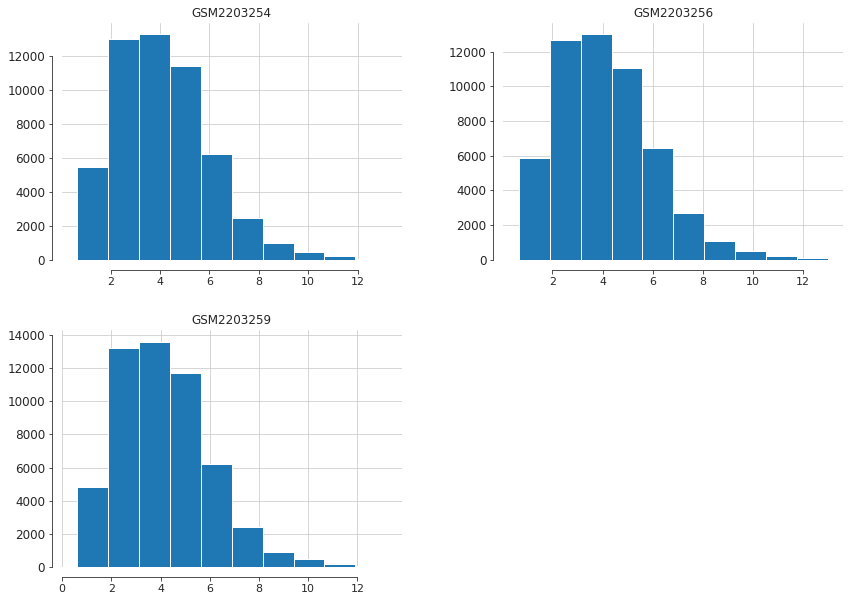

In [17]:
pivoted_control_samples.hist()
sns.despine(offset=10, trim=True)


In [18]:
pivoted_control_samples_average = pivoted_control_samples.median(axis=1)
print("Number of probes before filtering: ", len(pivoted_control_samples_average))

Number of probes before filtering:  53617


In [19]:
expression_threshold = pivoted_control_samples_average.quantile(0.25)

In [20]:
expressed_probes = pivoted_control_samples_average[pivoted_control_samples_average >= expression_threshold].index.tolist()
print("Number of probes above threshold: ", len(expressed_probes))


Number of probes above threshold:  40213


In [23]:
=\s = gse.pivot_samples("VALUE").loc[expressed_probes]


In [28]:
gse.phenotype_data[["title", "source_name_ch1"]]


,title,source_name_ch1
GSM2203254,liver biopsy 1,no NASH liver baseline
GSM2203255,liver biopsy 2,NASH liver baseline
GSM2203256,liver biopsy 3,no NASH liver follow-up
GSM2203257,liver biopsy 4,no NASH liver follow-up
GSM2203258,liver biopsy 5,NASH liver baseline
...,...,...
GSM2203480,liver biopsy 241,NASH liver baseline
GSM2203481,liver biopsy 243,no NASH liver baseline
GSM2203482,liver biopsy 244 (230),no NASH liver follow-up
GSM2203483,liver biopsy 245,NASH liver baseline


## Select control samples

In [44]:
dd = gse.phenotype_data[["title", "source_name_ch1"]].source_name_ch1[gse.phenotype_data[["title", "source_name_ch1"]].source_name_ch1.str.contains('no NASH liver baseline')]

In [48]:
dd.index

Index(['GSM2203254', 'GSM2203268', 'GSM2203272', 'GSM2203273', 'GSM2203280',
       'GSM2203285', 'GSM2203292', 'GSM2203301', 'GSM2203316', 'GSM2203320',
       'GSM2203333', 'GSM2203335', 'GSM2203343', 'GSM2203347', 'GSM2203352',
       'GSM2203356', 'GSM2203360', 'GSM2203365', 'GSM2203384', 'GSM2203396',
       'GSM2203397', 'GSM2203400', 'GSM2203405', 'GSM2203410', 'GSM2203411',
       'GSM2203417', 'GSM2203418', 'GSM2203420', 'GSM2203421', 'GSM2203425',
       'GSM2203426', 'GSM2203429', 'GSM2203432', 'GSM2203434', 'GSM2203443',
       'GSM2203455', 'GSM2203459', 'GSM2203461', 'GSM2203463', 'GSM2203464',
       'GSM2203468', 'GSM2203471', 'GSM2203481', 'GSM2203484'],
      dtype='object')